In [72]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

data = pd.read_csv("bank.csv")
data

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.0,72000.0,DebtCon,Self,NaN,0.0,2.0,187.27,1.0,21.0,NaN
3572,1,21600,154991.0,NaN,DebtCon,Self,NaN,2.0,4.0,165.60,0.0,43.0,38.015
3573,1,24000,35000.0,NaN,DebtCon,Self,3.0,1.0,0.0,177.50,0.0,16.0,NaN
3574,1,10000,NaN,25010.0,HomeImp,Self,5.0,0.0,3.0,326.13,4.0,17.0,NaN


#### özelliklerin birbirleri ile olan korelasyonlarına bakıldı

In [4]:
data.corr()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.071523,-0.056226,-0.050254,-0.051532,0.270980,0.345548,-0.150367,0.174759,-0.008981,0.236738
loan,-0.071523,1.000000,0.229546,0.337453,0.123293,-0.001463,-0.021577,0.089030,0.048633,0.092377,0.093636
mortdue,-0.056226,0.229546,1.000000,0.873280,-0.089949,-0.053310,-0.004971,0.141236,0.029452,0.340139,0.167358
value,-0.050254,0.337453,0.873280,1.000000,0.002501,-0.057279,-0.011014,0.182226,-0.005191,0.290439,0.134187
yoj,-0.051532,0.123293,-0.089949,0.002501,1.000000,-0.073500,0.065401,0.184283,-0.067735,0.017809,-0.052290
derog,0.270980,-0.001463,-0.053310,-0.057279,-0.073500,1.000000,0.234706,-0.083755,0.163750,0.048631,0.032324
delinq,0.345548,-0.021577,-0.004971,-0.011014,0.065401,0.234706,1.000000,0.044245,0.081166,0.151996,0.076943
clage,-0.150367,0.089030,0.141236,0.182226,0.184283,-0.083755,0.044245,1.000000,-0.113367,0.221071,-0.042852
ninq,0.174759,0.048633,0.029452,-0.005191,-0.067735,0.163750,0.081166,-0.113367,1.000000,0.097669,0.133751
clno,-0.008981,0.092377,0.340139,0.290439,0.017809,0.048631,0.151996,0.221071,0.097669,1.000000,0.180983


#### datada geçen özellikler ile ilgili açıklamalar

Historical data were gathered from bank customers to determine whether
a customer is a good or bad credit risk for a home equity loan. Bad risk
customers are more likely to default on the loan.

**BAD**:The response(or Y) variable is BAD, which is coded as 0 (good risk) or 1 (bad risk)<br>
**LOAN**: The amount of the loan requested (talep edilen kredi miktarı)<br>
**MORTDUE**: How much the customer needs to pay on their mortgage (mevcut mortgage borçları)<br>
**VALUE**: value of current property (mevcut mülkün değeri)<br>
**REASON** Debt consolidation or home improvement (DebtCon or HomeImp) (Ödemesi gelen borcu ertelemek için alınan kredi)<br>
**JOB**: Broad job category<br>
**YOJ**: Years on the job (şuan ki işindeki yılı)<br>
**DEROG**: Number of derogatory reports (olumsuzluk raporu)<br>
**DELINQ**: The number of delinquent trade lines (Ödenmemiş kredi limiti sayısı)<br>
**CLAGE**: Age of oldest trade line (oldest tradeline= credit account)(aylar içinde en eski kredi limitinin yaşı)<br>
**NINQ**: Number of recent credit inquiries (Son kredi sorgularının sayısı)<br>
**CLNO**: Number of credit limits<br>
**DEBTINC**: Debt to income ratio (Borç/Gelir oranı aylık)

Debt Consolidation : Borç konsolidasyonu terimi, genel olarak teminatsız olan diğer yükümlülükleri ve tüketici borçlarını ödemek için yeni bir kredi alma eylemini ifade eder. Birden çok borç, genellikle daha uygun ödeme koşullarıyla, tek ve daha büyük bir borç parçası halinde birleştirilir. Uygun ödeme koşulları daha düşük bir faiz oranı, daha düşük aylık ödeme veya her ikisini de içerir. Tüketiciler, borç konsolidasyonunu öğrenci kredi borcu, kredi kartı borcu ve diğer borçlarla başa çıkmak için bir araç olarak kullanabilirler.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-null   float64
 8   delinq   3225 non-null   float64
 9   clage    3397 non-null   float64
 10  ninq     3273 non-null   float64
 11  clno     3443 non-null   float64
 12  debtinc  2809 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 335.3+ KB


In [5]:
data.describe()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,3576.000000,3576.000000,3262.000000,3512.000000,3264.000000,3149.000000,3225.000000,3397.000000,3273.000000,3443.000000,2809.000000
mean,0.199385,18529.697987,74013.907992,101076.922759,8.832644,0.261670,0.432558,179.832529,1.186373,21.507116,33.831737
std,0.399594,11262.834060,44016.833772,54865.275351,7.568046,0.865178,1.099230,87.066198,1.728723,10.167490,9.061837
min,0.000000,1100.000000,2619.000000,8800.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.720000
25%,0.000000,11000.000000,46700.250000,65753.000000,3.000000,0.000000,0.000000,115.600000,0.000000,15.000000,29.140000
50%,0.000000,16200.000000,65858.000000,89183.000000,7.000000,0.000000,0.000000,173.640000,1.000000,20.000000,34.747000
75%,0.000000,23100.000000,91717.000000,118928.250000,13.000000,0.000000,0.000000,230.710000,2.000000,26.000000,38.940000
max,1.000000,89900.000000,399550.000000,850000.000000,41.000000,10.000000,15.000000,1168.230000,17.000000,71.000000,203.312000


#### bad değerleri sayıları

In [135]:
data["bad"].value_counts()

0    1840
1     178
Name: bad, dtype: int64

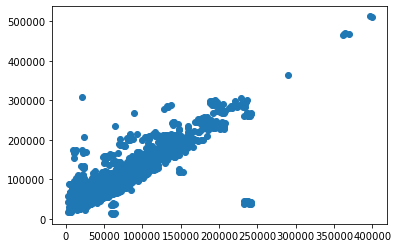

In [11]:
#mevcut varlıkların değerleri ile ödemesi gereken mortgage arasında pozitif korelasyon olduğu görülüyor

plt.scatter(x='mortdue', y='value', data=data)

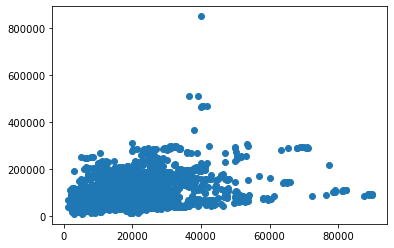

In [29]:
plt.scatter(x='loan', y='value', data=data)

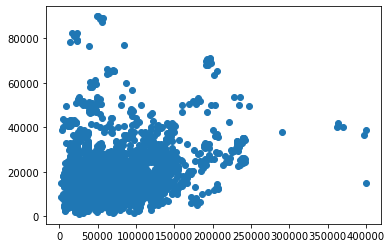

In [85]:
plt.scatter(x='mortdue', y='loan', data=data)

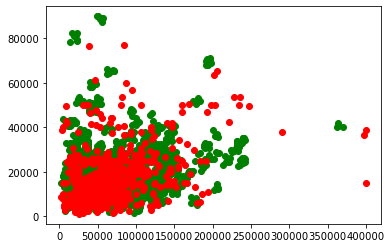

In [110]:

colors = {0:'g', 1:'r'}

fig, ax = plt.subplots()

for i in range(len(data['mortdue'])):
    ax.scatter(data['mortdue'][i], data['loan'][i],color=colors[data['bad'][i]])


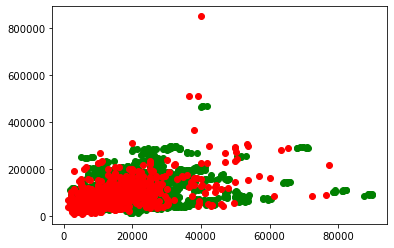

In [111]:

colors = {0:'g', 1:'r'}

fig, ax = plt.subplots()

for i in range(len(data['loan'])):
    ax.scatter(data['loan'][i], data['value'][i],color=colors[data['bad'][i]])

#### outliers gözlemlenebilir.

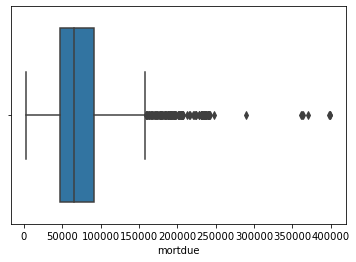

In [15]:
sns.boxplot(data["mortdue"])
plt.show()

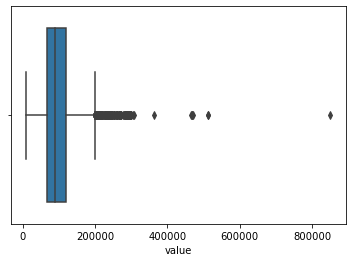

In [16]:
sns.boxplot(data["value"])
plt.show()

In [17]:
data.groupby("bad")["mortdue"].mean()

bad
0    75242.395117
1    69029.488140
Name: mortdue, dtype: float64

In [87]:
data.groupby("bad")["mortdue"].describe()

,count,mean,std,min,25%,50%,75%,max
bad,,,,,,,,
0,2617.0,75242.395117,42983.671462,2619.0,48139.0,67389.0,93309.0,369874.0
1,645.0,69029.488140,47692.765434,2800.0,38986.0,60000.0,84900.0,399550.0


####  kredinin malvarlığı ile bağlantısı olmadığı düşünülebilir.ortalamaya bakıldığında iyi puanlama alanların mal varlığı ortalaması daha fazla olduğu görülüyor. ama max malvarlığına sahip biri bad olarak değerlendirilmiş

In [88]:
data.groupby("bad")["value"].describe()

,count,mean,std,min,25%,50%,75%,max
bad,,,,,,,,
0,2859.0,102394.448489,52031.226164,12414.0,67724.5,90805.0,119338.0,469748.0
1,653.0,95308.460184,65588.405366,8800.0,57000.0,81020.0,116160.0,850000.0


In [18]:
data.groupby("bad")["value"].mean()

bad
0    102394.448489
1     95308.460184
Name: value, dtype: float64

In [19]:
data.groupby("bad")["loan"].mean()

bad
0    18931.645127
1    16915.708275
Name: loan, dtype: float64

In [23]:
#uygunsuz rapor sayıları kötü puanlamada etkili gibi gözüküyor

data.groupby("bad")["derog"].mean()

bad
0    0.140732
1    0.716012
Name: derog, dtype: float64

In [24]:
#geciktirme sayıları kötü puanlamada etkili gibi gözüküyor

data.groupby("bad")["delinq"].mean()

bad
0    0.238263
1    1.174888
Name: delinq, dtype: float64

In [26]:
# kötü not alanların borç/gelir oranı fazla

data.groupby("bad")["debtinc"].mean()

bad
0    33.179142
1    40.881416
Name: debtinc, dtype: float64

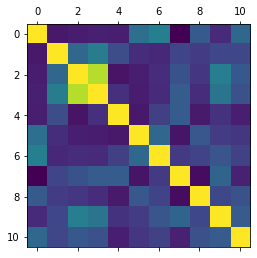

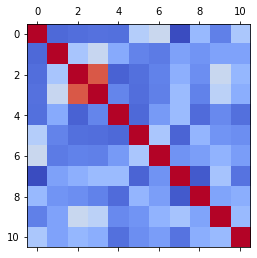

In [27]:
plt.matshow(data.corr())
plt.show()
plt.matshow(data.corr(),cmap='coolwarm')

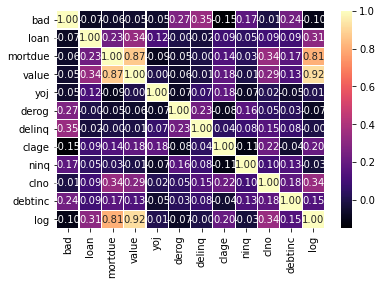

In [114]:
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [33]:
data["mortdue"].var()

1937481655.3034937

In [34]:
data.var()

bad        1.596751e-01
loan       1.268514e+08
mortdue    1.937482e+09
value      3.010198e+09
yoj        5.727532e+01
derog      7.485335e-01
delinq     1.208307e+00
clage      7.580523e+03
ninq       2.988482e+00
clno       1.033779e+02
debtinc    8.211688e+01
dtype: float64

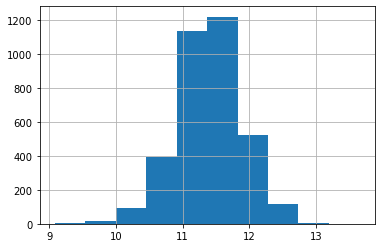

In [42]:
np.log(data["value"]).hist()

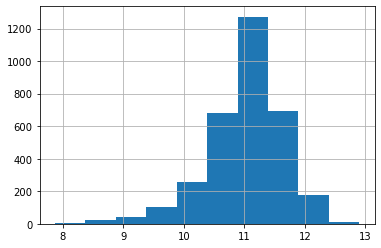

In [43]:
np.log(data["mortdue"]).hist()

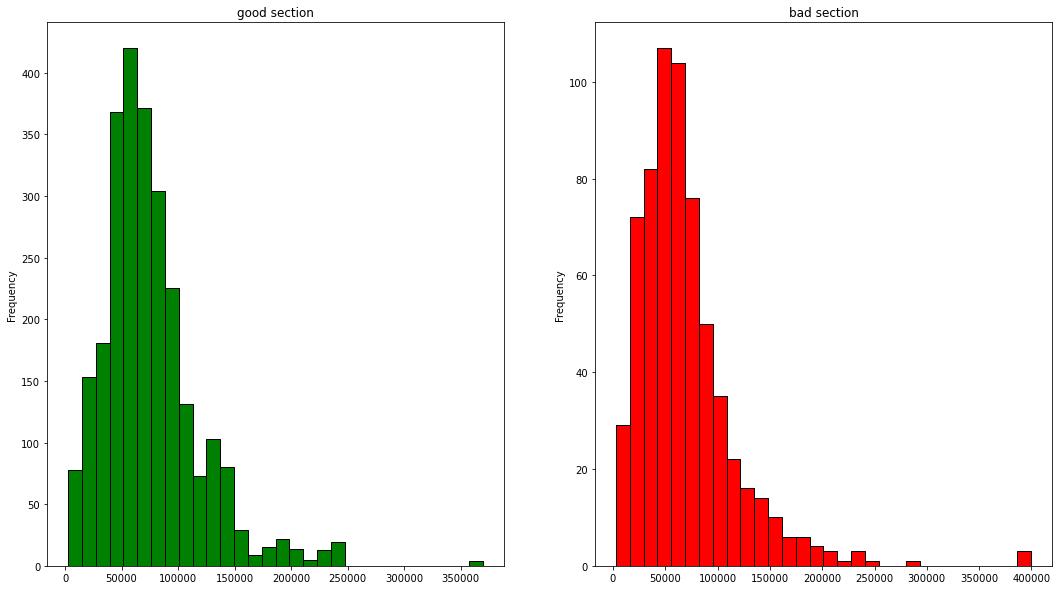

In [54]:
fig, ax = plt.subplots(1, 2, figsize = (18, 10))

data[data["bad"] == 0]["mortdue"].plot.hist(ax = ax[0], bins = 30, edgecolor = "black", color = "green")
ax[0].set_title("good section")


data[data["bad"] == 1 ]["mortdue"].plot.hist(ax = ax[1], bins = 30, edgecolor = "black", color = "red")
ax[1].set_title("bad section")
plt.show()

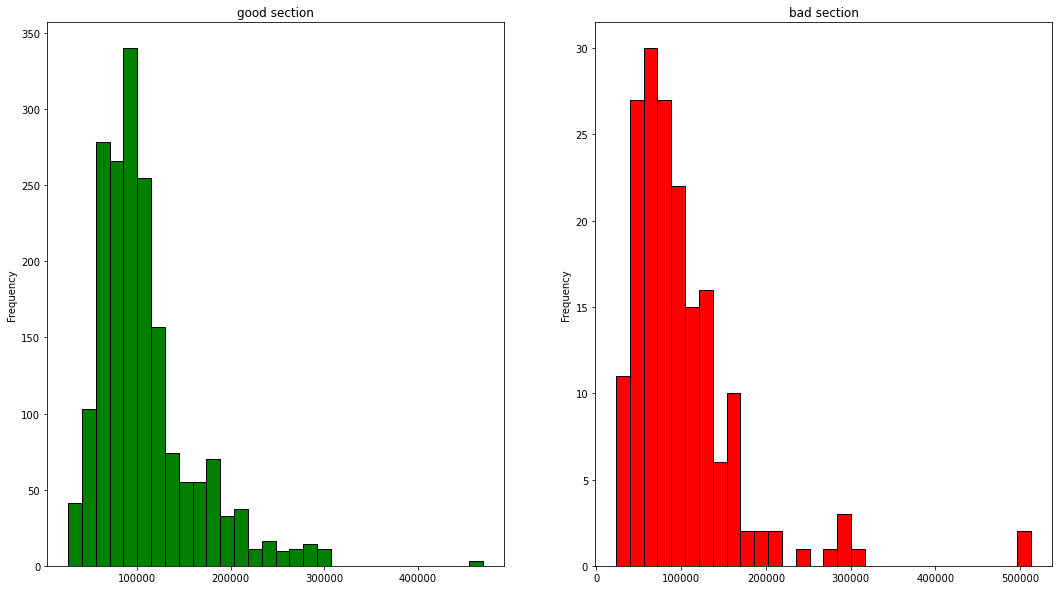

In [134]:
fig, ax = plt.subplots(1, 2, figsize = (18, 10))

data[data["bad"] == 0]["value"].plot.hist(ax = ax[0], bins = 30, edgecolor = "black", color = "green")
ax[0].set_title("good section")


data[data["bad"] == 1 ]["value"].plot.hist(ax = ax[1], bins = 30, edgecolor = "black", color = "red")
ax[1].set_title("bad section")
plt.show()

In [62]:
print(data.groupby("reason")["loan"].median())
print("--------------------------------")
print(data.groupby("reason")["loan"].mean())

reason
DebtCon    17900
HomeImp    12600
Name: loan, dtype: int64
--------------------------------
reason
DebtCon    19868.705188
HomeImp    15892.911153
Name: loan, dtype: float64


In [77]:
bad_reason = data[["bad", "reason"]]
bad_reason

,bad,reason
0,0,HomeImp
1,0,DebtCon
2,0,DebtCon
3,0,DebtCon
4,0,DebtCon
...,...,...
3571,1,DebtCon
3572,1,DebtCon
3573,1,DebtCon
3574,1,HomeImp


In [82]:
# kötü derecelendirmesi olmayanlar borçlarını ödemek için kredi çekmiş. Sürekli borç döngüsü içerisinde oldukları için 
# kötü puanlama almamış olabilirler.

_ =pd.crosstab(index=data["bad"], columns=data["reason"], normalize=True)
_

reason,DebtCon,HomeImp
bad,,
0,0.563138,0.237387
1,0.128317,0.071158


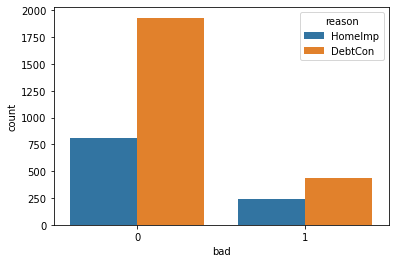

In [83]:
sns.countplot("bad", hue="reason", data=data)
plt.show()

In [146]:
data=data.dropna(how='any')
data

,level_0,index,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
1,1,154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
2,2,155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
3,3,156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
4,4,157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,2013,3544,1,7200,15637.0,39660.0,HomeImp,Self,6.0,0.0,1.0,354.24,3.0,42.0,33.624
2014,2014,3546,1,53400,228236.0,305514.0,HomeImp,Self,6.0,0.0,0.0,11.15,0.0,2.0,34.558
2015,2015,3547,1,27300,106221.0,137727.0,DebtCon,Self,3.0,0.0,0.0,300.57,3.0,45.0,32.560
2016,2016,3548,1,37300,68789.0,86172.0,HomeImp,Self,2.0,0.0,6.0,235.64,2.0,25.0,114.051


### boş bırakılan özelliklerden dolayı bu değerler düşürüldü. Dataya bir de bu şekilde bakıldı.

In [148]:
data["job"].unique()

array(['Mgr', 'Office', 'Other', 'ProfEx', 'Sales', 'Self'], dtype=object)

#### iş türleri incelendi ve sayılarına bakıldı

In [120]:
data["job"].value_counts()

Other     774
ProfEx    539
Office    348
Mgr       269
Self       58
Sales      30
Name: job, dtype: int64

In [121]:
data.describe()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,log
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,0.088206,19010.257681,76337.035183,106899.244797,9.003964,0.150149,0.264123,180.645020,1.037661,22.265114,34.105829,11.475395
std,0.283665,10768.607345,44476.368189,54026.707096,7.573012,0.580421,0.789816,84.420116,1.578414,9.457238,8.438411,0.447209
min,0.000000,1700.000000,5076.000000,23031.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,4.030000,10.044596
25%,0.000000,12000.000000,49577.250000,71287.250000,3.000000,0.000000,0.000000,118.205000,0.000000,16.000000,29.295500,11.174473
50%,0.000000,16900.000000,67595.000000,94514.000000,7.000000,0.000000,0.000000,176.670000,0.000000,21.000000,34.949000,11.456503
75%,0.000000,23600.000000,92922.750000,121220.750000,13.000000,0.000000,0.000000,229.692500,2.000000,27.000000,38.952000,11.705368
max,1.000000,89900.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.230000,13.000000,64.000000,144.189000,13.147349


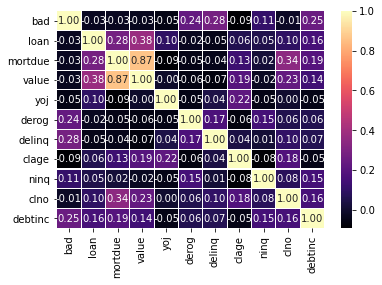

In [127]:
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

#### yukarda yapılan görselleştirmelerin aynıları değerler düşürüldükten sonra tekrar yapıldı pek fark olmadığı gözlemlendi.

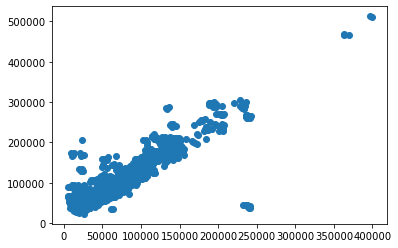

In [128]:
plt.scatter(x='mortdue', y='value', data=data)

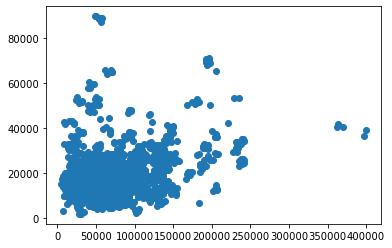

In [129]:
plt.scatter(x='mortdue', y='loan', data=data)

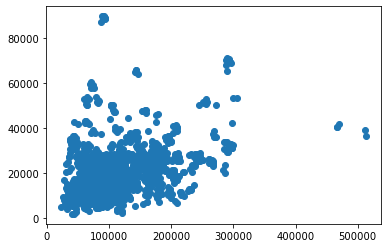

In [131]:
plt.scatter(x='value', y='loan', data=data)

#### %64 oranında DebtCon için başvuran good section gözlemlendi

In [132]:
_ =pd.crosstab(index=data["bad"], columns=data["reason"], normalize=True)
_

reason,DebtCon,HomeImp
bad,,
0,0.646184,0.265610
1,0.061447,0.026759


In [141]:
_ =pd.crosstab(index=data["bad"], columns=data["reason"])
_

reason,DebtCon,HomeImp
bad,,
0,1304,536
1,124,54


In [158]:
data = data.drop('index', axis=1)

In [159]:
data = data.drop('level_0', axis=1)

In [160]:
data

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
1,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
2,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
3,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
4,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,1,7200,15637.0,39660.0,HomeImp,Self,6.0,0.0,1.0,354.24,3.0,42.0,33.624
2014,1,53400,228236.0,305514.0,HomeImp,Self,6.0,0.0,0.0,11.15,0.0,2.0,34.558
2015,1,27300,106221.0,137727.0,DebtCon,Self,3.0,0.0,0.0,300.57,3.0,45.0,32.560
2016,1,37300,68789.0,86172.0,HomeImp,Self,2.0,0.0,6.0,235.64,2.0,25.0,114.051


In [161]:
_ =pd.crosstab(index=data["bad"], columns=data["job"])
_

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
0,242,326,694,504,23,51
1,27,22,80,35,7,7


In [162]:
_ =pd.crosstab(index=data["bad"], columns=data["job"], normalize=True)
_

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
0,0.119921,0.161546,0.343905,0.249752,0.011397,0.025273
1,0.013380,0.010902,0.039643,0.017344,0.003469,0.003469


In [164]:
# çoğu meslek grupları borçlarını ödemek için kredi çekmek isterken kendi işini yapanlar home improvoment kredisi için
# çoğunlukla başvurmuş


_ =pd.crosstab(index=data["reason"], columns=data["job"], normalize='columns')
_

job,Mgr,Office,Other,ProfEx,Sales,Self
reason,,,,,,
DebtCon,0.784387,0.729885,0.723514,0.649351,0.866667,0.465517
HomeImp,0.215613,0.270115,0.276486,0.350649,0.133333,0.534483


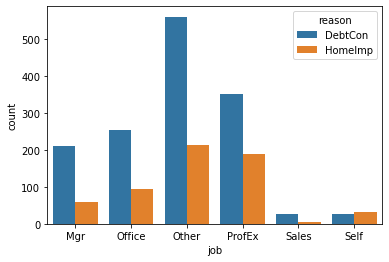

In [167]:
sns.countplot("job", hue="reason", data=data)
plt.show()

#### işindeki yılına göre kredi analizi yapıldı. Hangi yılda ne kadar kişi var tespit edildi.

In [246]:
data["yoj"].value_counts()

0.0     177
4.0     152
1.0     137
6.0     126
2.0     125
5.0     117
3.0     115
9.0     113
10.0    103
7.0      92
8.0      86
13.0     66
11.0     64
12.0     57
16.0     51
14.0     50
15.0     46
20.0     35
19.0     35
17.0     34
22.0     31
23.0     30
18.0     28
24.0     28
21.0     26
25.0     22
27.0     19
29.0     12
28.0     12
26.0     11
30.0      8
36.0      4
31.0      3
35.0      2
41.0      1
Name: yoj, dtype: int64

In [255]:
dt=data["yoj"].value_counts().to_frame()
dt = dt.reset_index()
dt.columns = ["yoj", "count"]
dt

,yoj,count
0,0.0,177
1,4.0,152
2,1.0,137
3,6.0,126
4,2.0,125
5,5.0,117
6,3.0,115
7,9.0,113
8,10.0,103
9,7.0,92


#### işte bulunma süreleri arttıkça kredi  sayısı düşüyor. Çalışmanın ilk yıllarında krediler fazla 

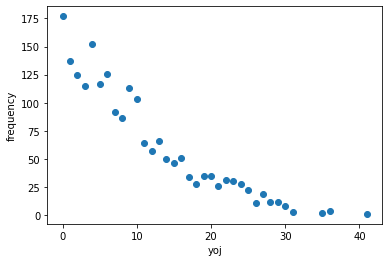

In [264]:
plt.scatter(x='yoj', y='count', data=dt)
plt.xlabel("yoj")
plt.ylabel("frequency")
plt.show()

In [77]:
data = data.dropna(how='any')

#### 0-10000 arası kredi talebi bad section'da biraz fazla. 350 kişi 0-10000 arası olsa 50 kişi bad section %15'ine denk geliyor.

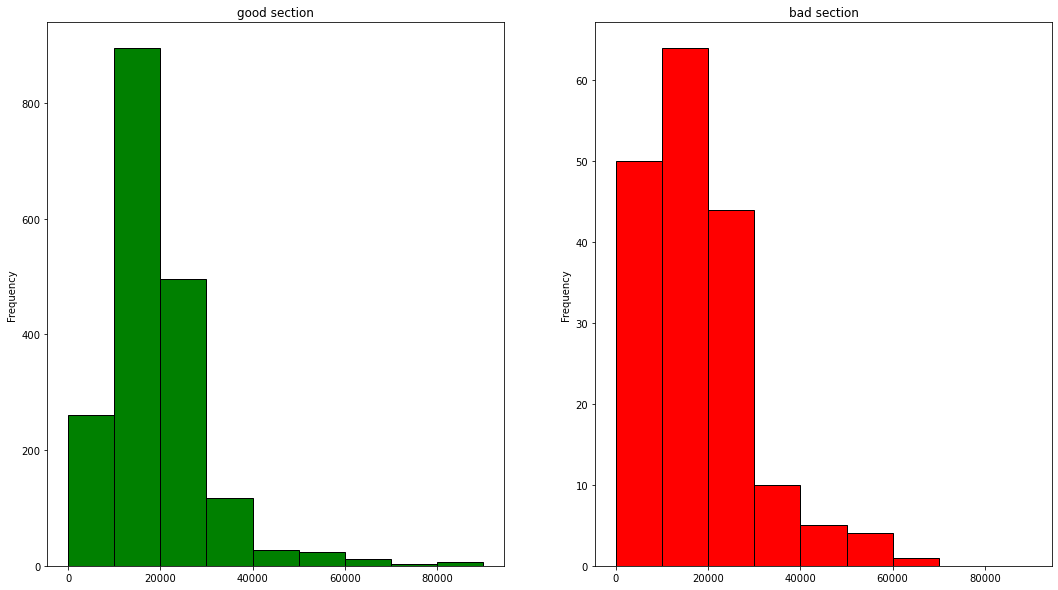

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (18, 10))

data[data["bad"] == 0]["loan"].plot.hist(ax = ax[0], bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000],
                                         edgecolor = "black", color = "green")
ax[0].set_title("good section")


data[data["bad"] == 1 ]["loan"].plot.hist(ax = ax[1], bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000],
                                          edgecolor = "black", color = "red")
ax[1].set_title("bad section")
plt.show()

#### bad section mal varlığı ile pek alakası olduğu söylenemez.sadece 0-50000 arası bad section oran olarak biraz fazla gözüküyor.

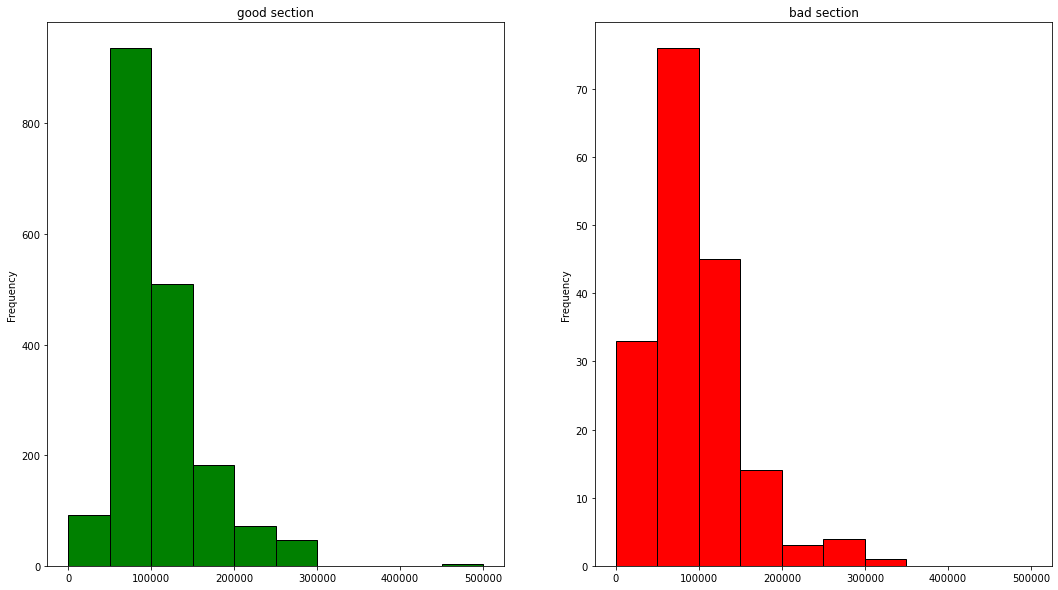

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (18, 10))

data[data["bad"] == 0]["value"].plot.hist(ax = ax[0], bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000],
                                         edgecolor = "black", color = "green")
ax[0].set_title("good section")


data[data["bad"] == 1 ]["value"].plot.hist(ax = ax[1], bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000],
                                          edgecolor = "black", color = "red")
ax[1].set_title("bad section")
plt.show()

### özellikleri kategorik ve numerik olarak gruplara ayırma

In [117]:
numeric_variable=[]
categoric_variable=[]
for col_name in data.columns:
    if data[col_name].dtype != "object": 
        numeric_variable.append(col_name)
    else:
        categoric_variable.append(col_name)

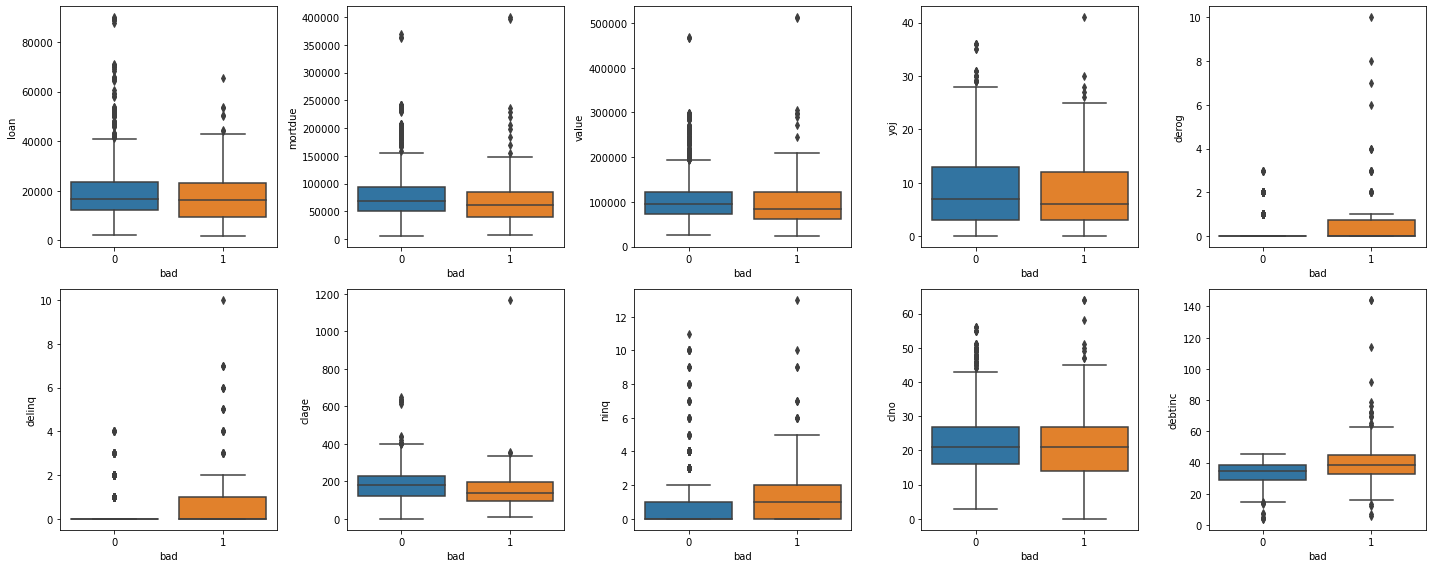

In [119]:
plt.figure(figsize=(20, 8))
for i, col in enumerate(data.select_dtypes(data[numeric_variable].dtypes).columns[1:], 1):
    plt.subplot(2, 5, i)
    sns.boxplot(data.bad, data[col])
    plt.tight_layout()

## tek tek bütün özelliklerin birbiriyle olan pairplot'ları çizdirildi.

c:\python38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


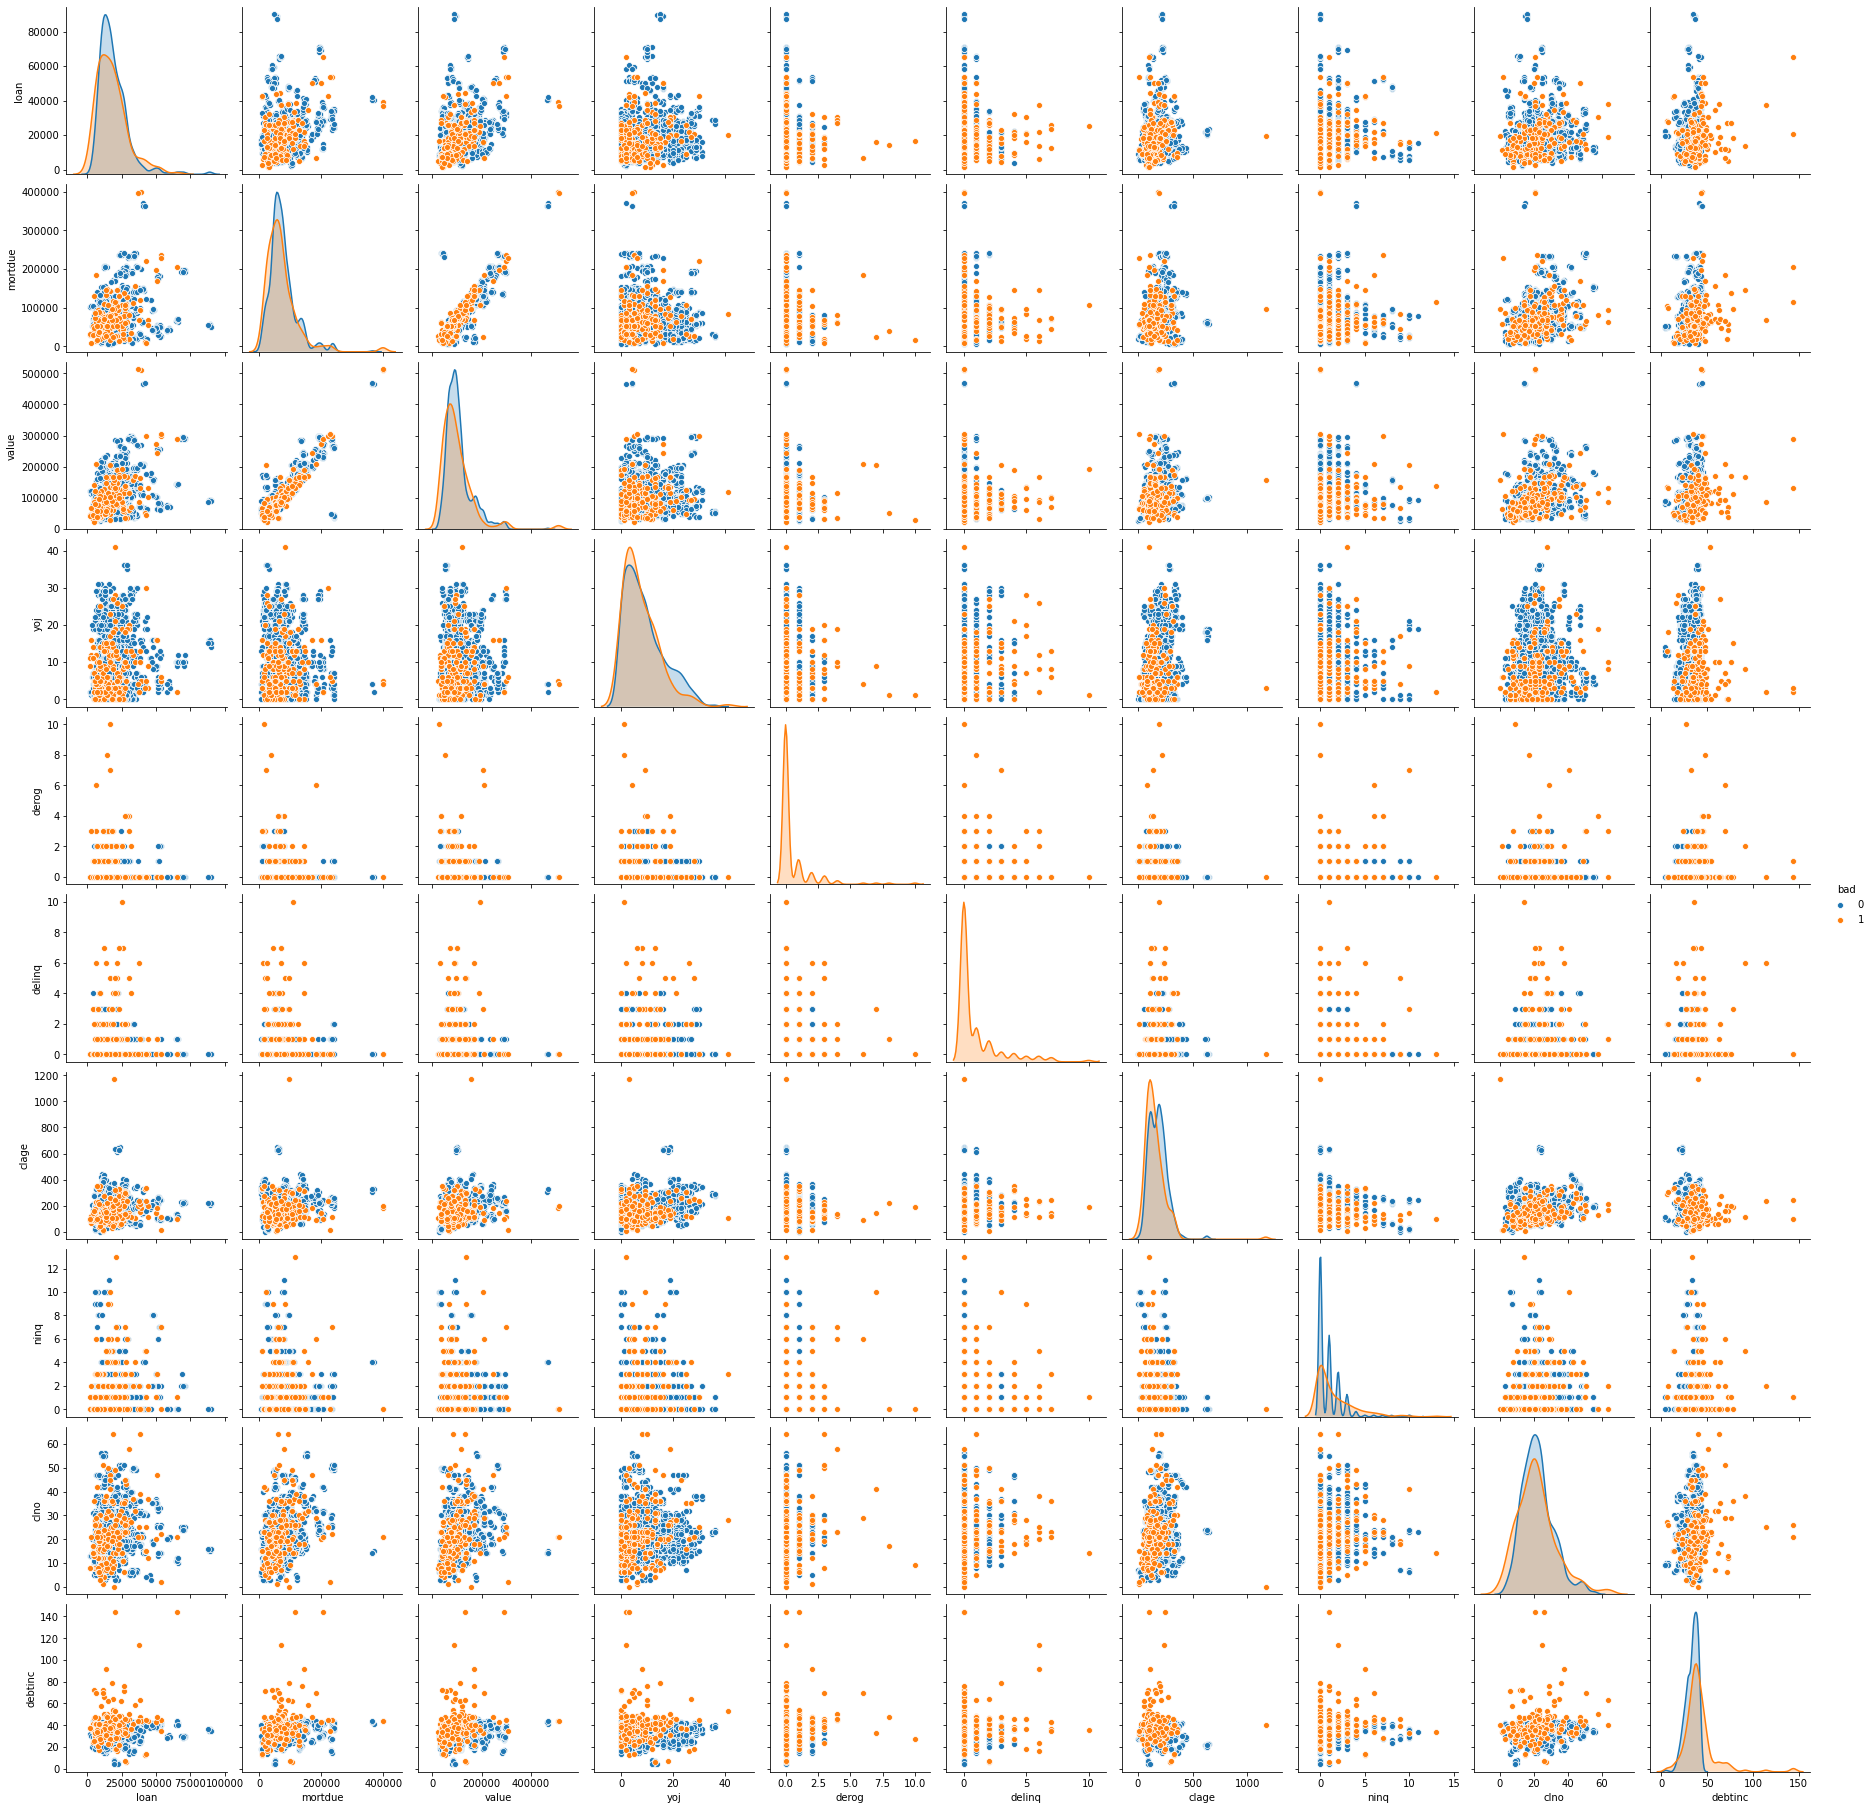

In [120]:
sns.pairplot(data,hue="bad")

#### istenilen zcore'a göre outliers'ların düşürülmesi için

In [12]:
#std : istenilen zscore

from scipy import stats
def zscore(categoric_data, value, data, std):
    d = data[[categoric_data, value]]
    zet = np.abs(stats.zscore(d))
    scoreList=[]
    for i in range(len(zet)):
        if zet[i][1]<std:
            scoreList.append((d.iloc[i,0],d.iloc[i][1]))
        else: 
            continue
    df = pd.DataFrame(scoreList)
    df.columns = [categoric_data, value]
    return df

In [24]:
df = zscore("bad", "value", data, 1)

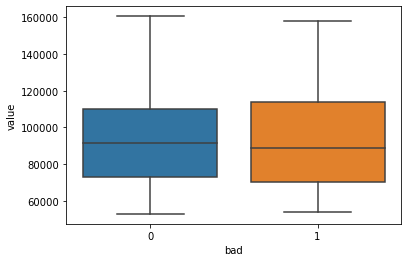

In [25]:
sns.boxplot(x="bad", y="value", data=df)

#### üstteki zscore kullanarak outlier düşürülen alttaki ise verinin ham hali

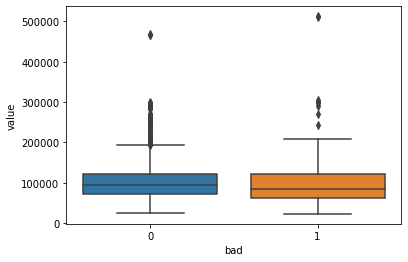

In [27]:
sns.boxplot(x="bad", y="value", data=data)

#### mal varlıklarının outliers'dan temizlenmiş hali

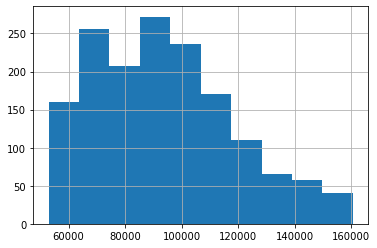

In [28]:
df["value"].hist()

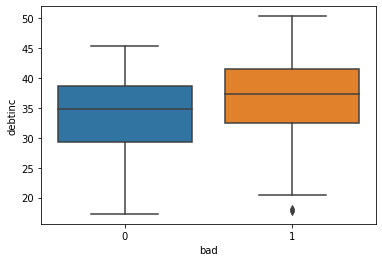

In [29]:
p = zscore("bad", "debtinc", data, 2)
sns.boxplot(x="bad", y="debtinc", data=p)

#### üstteki zscore=2'ye göre outliers'ların düşürülmüş hali alttaki ise ham veri

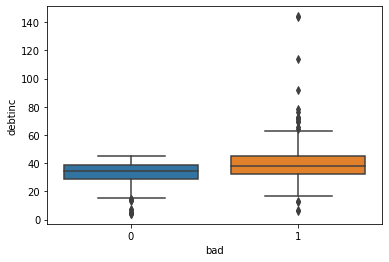

In [30]:
sns.boxplot(x="bad", y="debtinc", data=data)

In [3]:
# anova yok bad 2 seçenekli olduğu için.

In [76]:
data

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,1,8400,31800.0,72000.0,DebtCon,Self,NaN,0.0,2.0,187.27,1.0,21.0,NaN
3572,1,21600,154991.0,NaN,DebtCon,Self,NaN,2.0,4.0,165.60,0.0,43.0,38.015
3573,1,24000,35000.0,NaN,DebtCon,Self,3.0,1.0,0.0,177.50,0.0,16.0,NaN
3574,1,10000,NaN,25010.0,HomeImp,Self,5.0,0.0,3.0,326.13,4.0,17.0,NaN


## shapiro-wilk sınamaları

In [7]:
from scipy.stats import shapiro

stat, p = shapiro(data["loan"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.836017, p=0.000


In [8]:
alpha=0.05 

if p > alpha:
    print('Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')

Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)


In [9]:
stat, p = shapiro(data["mortdue"])
print('Statistics=%.3f, p=%.3f' %(stat, p))

Statistics=0.862, p=0.000


In [10]:
alpha=0.05 

if p > alpha:
    print('Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')

Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)


In [68]:
stat, p = shapiro(df["value"])
print('Statistics=%.3f, p=%.6f' %(stat, p))
alpha=0.05 

if p > alpha:
    print('Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')

Statistics=0.965, p=0.000000
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)


##  t-test'ler

In [39]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [43]:
mean_confidence_interval(data["loan"])

(18529.697986577183, 18160.427939461777, 18898.96803369259)

In [69]:
# verilen özelliğin ortalamasının verilen değer olup olmadığı kontrol ediliyor
# bunun öncesinde fikir edinmek adına güven aralığına bakılıyor.

# H0 mu = 18500
# H1 mu != 18500

alpha = 0.05
stat, p = stats.ttest_1samp(data["loan"], popmean = 18500)

print('Statistics=%.5f, p=%.5f' % (stat, p))

if p > alpha:
    print('Örneklem 18500 ortalama değerine sahiptir  (Fail to Reject H0)')
else:
    print('Örneklem 18500 ortalama değerine sahip değildir (reject H0)')

Statistics=0.15768, p=0.87472
Örneklem 18500 ortalama değerine sahiptir  (Fail to Reject H0)


In [52]:
mean_confidence_interval(df["value"])

(94048.46793650794, 92817.47165649457, 95279.4642165213)

In [70]:
# H0 = 93000
# H1 != 93000 

alpha = 0.05
stat, p = stats.ttest_1samp(df["value"], popmean = 93000)

print('Statistics=%.5f, p=%.5f' % (stat, p))

if p > alpha:
    print('Örneklem 93000 ortalama değerine sahiptir  (Fail to Reject H0)')
else:
    print('Örneklem 93000 ortalama değerine sahip değildir (reject H0)')

Statistics=1.67063, p=0.09499
Örneklem 93000 ortalama değerine sahiptir  (Fail to Reject H0)


## Kolmogorov-Smirnov ve levene testleri

In [67]:
# loan ve value özelliklerinin aynı dağılımdan gelip gelmedikleri kontrol ediliyor.
stat, p = scipy.stats.ks_2samp(data.loan, data.value)
print('Statistics=%.5f, p=%.5f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Örneklem Aynı Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Örneklem Aynı Dağılımdan gelmemektedir (reject H0)')

Statistics=0.89737, p=0.00000
Örneklem Aynı Dağılımdan gelmemektedir (reject H0)


In [81]:
stat, p = scipy.stats.levene(data.loan, data.value)
print('Statistics=%.5f, p=%.5f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('iki özelliğin varyansları eşittir (Fail to Reject H0)')
else:
    print('iki özelliğin varyansları eşit değildir (reject H0)')

Statistics=949.78659, p=0.00000
iki özelliğin varyansları eşit değildir (reject H0)


In [121]:
# mortdue ve loan özelliklerinin aynı dağılımdan gelip gelmedikleri kontrol ediliyor.
stat, p = scipy.stats.ks_2samp(data.mortdue, data.loan)
print('Statistics=%.5f, p=%.5f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Örneklem Aynı Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Örneklem Aynı Dağılımdan gelmemektedir (reject H0)')

Statistics=0.82012, p=0.00000
Örneklem Aynı Dağılımdan gelmemektedir (reject H0)


In [122]:
stat, p = scipy.stats.levene(data.mortdue, data.loan)
print('Statistics=%.5f, p=%.5f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('iki özelliğin varyansları eşittir (Fail to Reject H0)')
else:
    print('iki özelliğin varyansları eşit değildir (reject H0)')

Statistics=881.76658, p=0.00000
iki özelliğin varyansları eşit değildir (reject H0)


### bağımsız iki örneklem T-testi

In [77]:
data = pd.read_csv("bank.csv")
data = data.dropna(how='any')
data["bad"] = data["bad"].apply(lambda x: "good" if(x==0)  else "badly")
data["bad"].value_counts()

good     1840
badly     178
Name: bad, dtype: int64

In [78]:
df = data[["value","bad"]]

group = pd.unique(df.bad.values)

value_bad = {grp:df["value"][df.bad == grp] for grp in group}
df

,value,bad
153,136877.0,good
154,96784.0,good
155,36486.0,good
156,76718.0,good
157,43684.0,good
...,...,...
3544,39660.0,badly
3546,305514.0,badly
3547,137727.0,badly
3548,86172.0,badly


In [80]:
print("good sinifi p-value:",shapiro(value_bad['good'])[1])
print("bad sinifi p-value:",shapiro(value_bad['badly'])[1])

good sinifi p-value: 5.560814734934101e-38
bad sinifi p-value: 1.3988518836822235e-16


In [82]:
import scipy.stats as stats
stats.levene(value_bad["good"], value_bad["badly"])

LeveneResult(statistic=3.9912413972700382, pvalue=0.0458714974437462)

In [83]:
stats.ttest_ind(value_bad["good"], value_bad["badly"], equal_var=False)

Ttest_indResult(statistic=1.1223807598767526, pvalue=0.2630653333585097)

In [84]:
# sınıfların değerleri normal dağılım değildir 
# varyansları homojen değildir. bunlardan dolayı equal varyans False yapılır.
# sonuç p-value >0,05 H0 doğrudur diyoruz. 
# iyi ve kötü kredi notu alan müşterilerin mal varlıkları arasında anlamlı bir sonuç bulunamamıştır.